In [4]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from db.db_config import db_config

In [5]:
# Establish a Database Connection
connection = mysql.connector.connect(**db_config)

In [6]:
# SQL query to retrieve data from the 'destinations' table
query = "SELECT * FROM destinations"

# Load data into a Pandas DataFrame
df = pd.read_sql(query, connection)

C:\Users\Ahmad Jibril H\AppData\Local\Temp\ipykernel_25724\3060913710.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


In [9]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           31 non-null     int64  
 1   name         31 non-null     object 
 2   label        31 non-null     object 
 3   rating       31 non-null     float64
 4   num_reviews  31 non-null     int64  
 5   description  31 non-null     object 
 6   location     31 non-null     object 
dtypes: float64(1), int64(2), object(4)
memory usage: 1.8+ KB


,id,name,label,rating,num_reviews,description,location
0,1,Uluwatu Temple,Hindu temple,4.6,33325,"Perched on a cliff, this ancient Hindu temple ...","Pecatu, South Kuta, Badung Regency, Bali"
1,2,Pura Tirta Empul,Hindu temple,4.6,19813,Hindu Balinese temple with a bathing area cont...,"Tampaksiring, Gianyar Regency, Bali 80552"
2,3,Ubud Palace,Tourist attraction,4.2,9823,"Iconic temple featuring art, Balinese dance pe...","Jl. Raya Ubud No.8, Ubud, Kecamatan Ubud, Kabu..."
3,4,Sacred Monkey Forest Sanctuary,Nature preserve,4.5,39351,"Hindu temple complex set in the jungle, renown...","Jl. Monkey Forest, Ubud, Kecamatan Ubud, Kabup..."
4,5,Ulun Danu Beratan Temple,Hindu temple,4.7,35441,"Scenic Hindu temple on a lake with gardens, bo...","Danau Beratan, Candikuning, Baturiti, Tabanan ..."


In [10]:
df.describe()

,id,rating,num_reviews
count,31.000000,31.000000,31.000000
mean,21.580645,4.522581,15434.354839
std,15.228863,0.172645,18684.941152
min,1.000000,4.000000,232.000000
25%,8.500000,4.500000,3318.000000
50%,19.000000,4.600000,9250.000000
75%,32.500000,4.600000,17151.000000
max,55.000000,4.800000,83512.000000


In [15]:
# Use the factorize method to convert the 'label' column to numeric codes
df['label_numeric'] = pd.factorize(df['label'])[0]

In [17]:
# Convert the 'label' column to 'category' data type
df['label'] = df['label'].astype('category')

# Create a dictionary to map numeric codes to original labels
label_mapping = dict(enumerate(df['label'].cat.categories))

# Use the factorize method to convert the 'label' column to numeric codes
df['label_numeric'] = pd.factorize(df['label'])[0]

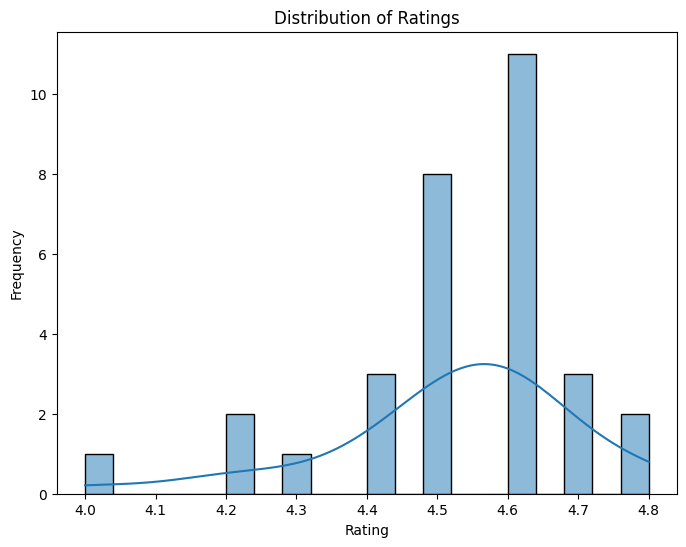

In [11]:
# Histogram of the 'rating' column
plt.figure(figsize=(8, 6))
sns.histplot(df['rating'], bins=20, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


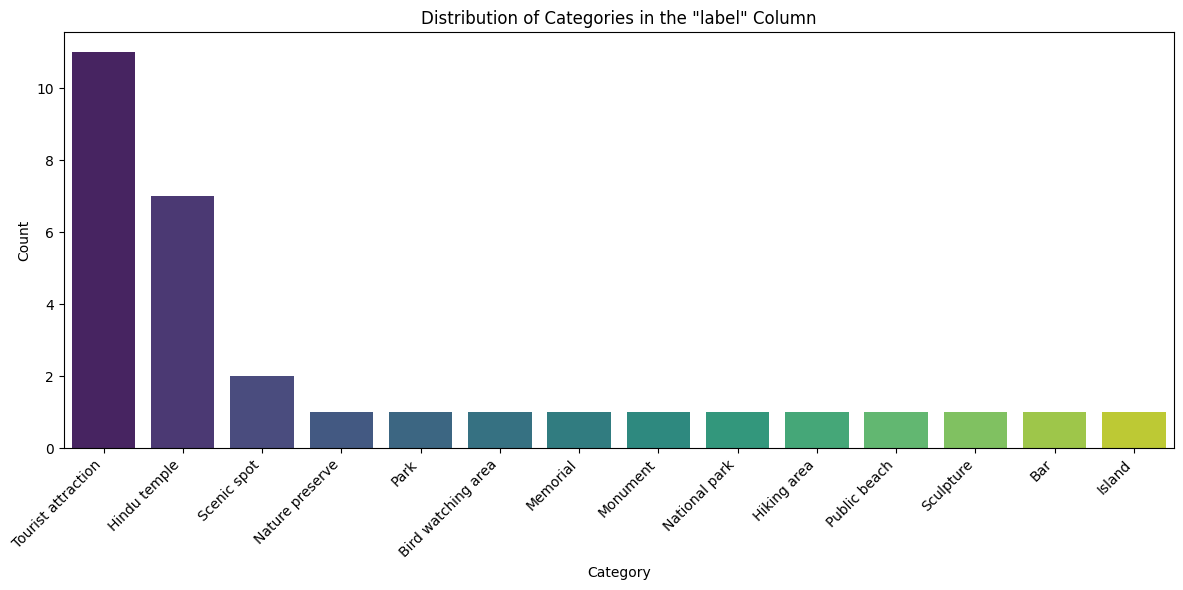

In [14]:
# Count the frequency of each category in the 'label' column
label_counts = df['label'].value_counts()

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')
plt.title('Distribution of Categories in the "label" Column')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

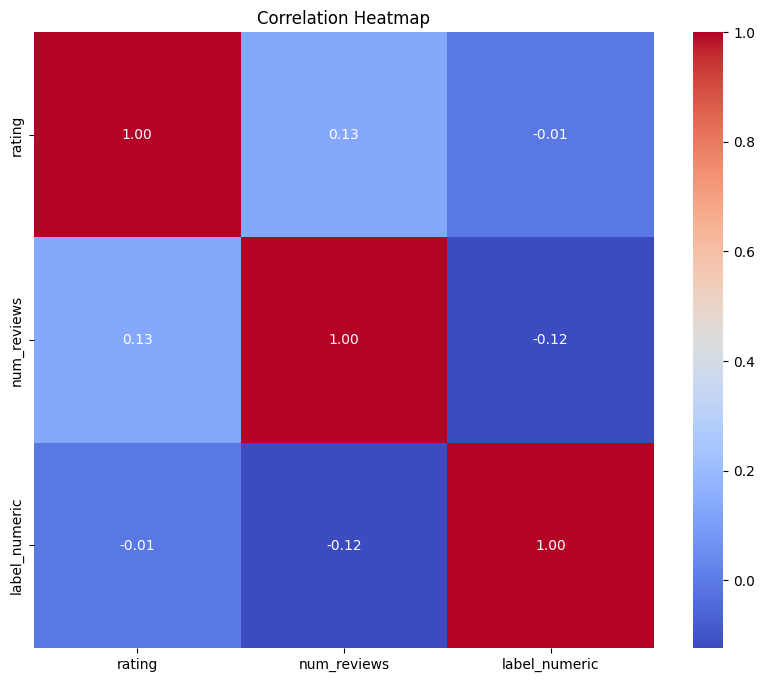

In [18]:
# Select only the numerical columns for correlation analysis
numerical_columns = ['rating', 'num_reviews', 'label_numeric']

# Calculate the correlation matrix for the selected columns
correlation_matrix = df[numerical_columns].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()
